# Analyse discriminante

Set the work directory. 
> If you don't know, you can use the following code to find out the current working directory: getwd()


In [13]:
# Importar as bibliotecas necessárias
library(MASS)

### 1º Passo: Preparação dos Dados

In [14]:
# Nesse caso, os dados já estão disponíveis no ambiente de trabalho através do formato .rda
load("poissons.rda")
poissons

,site,YEU,BR,OP,NAG,FOI,TUB,EC,MUS,POI,LON,LART,LAR,LARM,DYEU
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,site1,10,65,65,107,7,76,142,1,132,214,54,47,18,11
2,site1,9,43,39,67,29,113,99,2,122,220,49,44,16,10
3,site1,6,47,71,95,11,192,121,2,129,220,49,45,17,11
4,site1,7,70,40,66,8,310,90,2,133,225,52,48,15,11
5,site1,8,59,67,100,14,289,244,1,57,168,37,37,9,9
6,site1,8,46,55,112,17,115,153,1,59,178,38,35,11,9
7,site1,7,47,36,87,16,100,162,1,59,176,40,36,11,9
8,site1,11,79,46,95,20,106,141,4,47,176,39,31,10,8
9,site2,13,80,64,155,42,192,169,3,72,182,40,39,12,10


### 2º Passo: Análise Exploratória de Dados (AED)

In [15]:
poissons2 <- split(poissons[, c(2:15)], poissons[, 1])
poissons2

summary(poissons2$site1)
summary(poissons2$site2)
summary(poissons2$site3)

,YEU,BR,OP,NAG,FOI,TUB,EC,MUS,POI,LON,LART,LAR,LARM,DYEU
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10,65,65,107,7,76,142,1,132,214,54,47,18,11
2,9,43,39,67,29,113,99,2,122,220,49,44,16,10
3,6,47,71,95,11,192,121,2,129,220,49,45,17,11
4,7,70,40,66,8,310,90,2,133,225,52,48,15,11
5,8,59,67,100,14,289,244,1,57,168,37,37,9,9
6,8,46,55,112,17,115,153,1,59,178,38,35,11,9
7,7,47,36,87,16,100,162,1,59,176,40,36,11,9
8,11,79,46,95,20,106,141,4,47,176,39,31,10,8
,YEU,BR,OP,NAG,FOI,TUB,EC,MUS,POI,LON,LART,LAR,LARM,DYEU


      YEU              BR              OP             NAG        
 Min.   : 6.00   Min.   :43.00   Min.   :36.00   Min.   : 66.00  
 1st Qu.: 7.00   1st Qu.:46.75   1st Qu.:39.75   1st Qu.: 82.00  
 Median : 8.00   Median :53.00   Median :50.50   Median : 95.00  
 Mean   : 8.25   Mean   :57.00   Mean   :52.38   Mean   : 91.12  
 3rd Qu.: 9.25   3rd Qu.:66.25   3rd Qu.:65.50   3rd Qu.:101.75  
 Max.   :11.00   Max.   :79.00   Max.   :71.00   Max.   :112.00  
      FOI             TUB              EC             MUS      
 Min.   : 7.00   Min.   : 76.0   Min.   : 90.0   Min.   :1.00  
 1st Qu.:10.25   1st Qu.:104.5   1st Qu.:115.5   1st Qu.:1.00  
 Median :15.00   Median :114.0   Median :141.5   Median :1.50  
 Mean   :15.25   Mean   :162.6   Mean   :144.0   Mean   :1.75  
 3rd Qu.:17.75   3rd Qu.:216.2   3rd Qu.:155.2   3rd Qu.:2.00  
 Max.   :29.00   Max.   :310.0   Max.   :244.0   Max.   :4.00  
      POI              LON             LART            LAR       
 Min.   : 47.00   Min.  

      YEU              BR              OP              NAG       
 Min.   :12.00   Min.   : 80.0   Min.   : 64.00   Min.   :110.0  
 1st Qu.:13.00   1st Qu.: 89.5   1st Qu.: 66.25   1st Qu.:124.8  
 Median :14.00   Median : 99.0   Median : 78.00   Median :133.5  
 Mean   :15.50   Mean   :108.2   Mean   : 79.50   Mean   :133.1  
 3rd Qu.:15.75   3rd Qu.:125.5   3rd Qu.: 84.50   3rd Qu.:140.0  
 Max.   :23.00   Max.   :150.0   Max.   :115.00   Max.   :155.0  
      FOI             TUB              EC             MUS        
 Min.   :20.00   Min.   :115.0   Min.   :169.0   Min.   : 2.000  
 1st Qu.:21.75   1st Qu.:219.8   1st Qu.:195.5   1st Qu.: 2.750  
 Median :32.50   Median :313.5   Median :215.5   Median : 4.500  
 Mean   :33.50   Mean   :341.9   Mean   :260.8   Mean   : 4.625  
 3rd Qu.:43.75   3rd Qu.:475.0   3rd Qu.:236.8   3rd Qu.: 5.250  
 Max.   :49.00   Max.   :590.0   Max.   :617.0   Max.   :10.000  
      POI             LON             LART            LAR       
 Min.   :52

      YEU              BR              OP             NAG       
 Min.   :15.00   Min.   : 64.0   Min.   :119.0   Min.   :197.0  
 1st Qu.:20.50   1st Qu.:143.5   1st Qu.:185.5   1st Qu.:255.5  
 Median :22.00   Median :162.0   Median :218.0   Median :308.0  
 Mean   :23.57   Mean   :156.3   Mean   :207.9   Mean   :285.4  
 3rd Qu.:27.50   3rd Qu.:178.5   3rd Qu.:243.5   3rd Qu.:316.0  
 Max.   :32.00   Max.   :224.0   Max.   :260.0   Max.   :350.0  
      FOI             TUB               EC             MUS        
 Min.   :12.00   Min.   :  99.0   Min.   :157.0   Min.   : 1.000  
 1st Qu.:19.50   1st Qu.: 104.5   1st Qu.:403.0   1st Qu.: 2.000  
 Median :25.00   Median : 109.0   Median :558.0   Median : 2.000  
 Mean   :33.71   Mean   : 348.7   Mean   :515.7   Mean   : 3.429  
 3rd Qu.:43.50   3rd Qu.: 496.5   3rd Qu.:640.0   3rd Qu.: 3.000  
 Max.   :73.00   Max.   :1031.0   Max.   :809.0   Max.   :11.000  
      POI              LON             LART            LAR       
 Min.   : 

### 2.b Visualização Gráfica

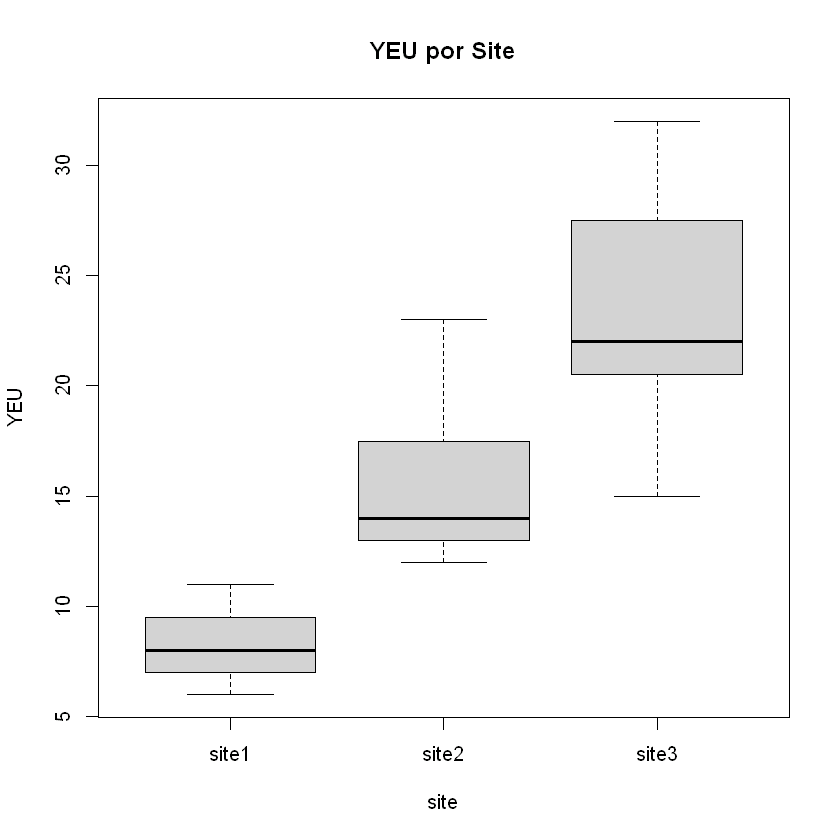

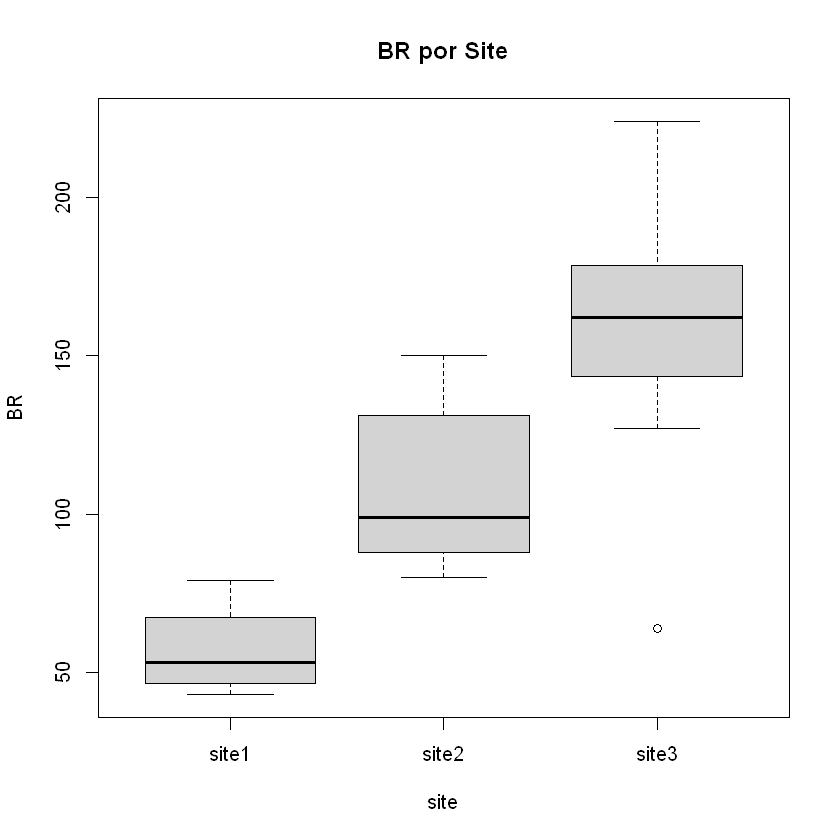

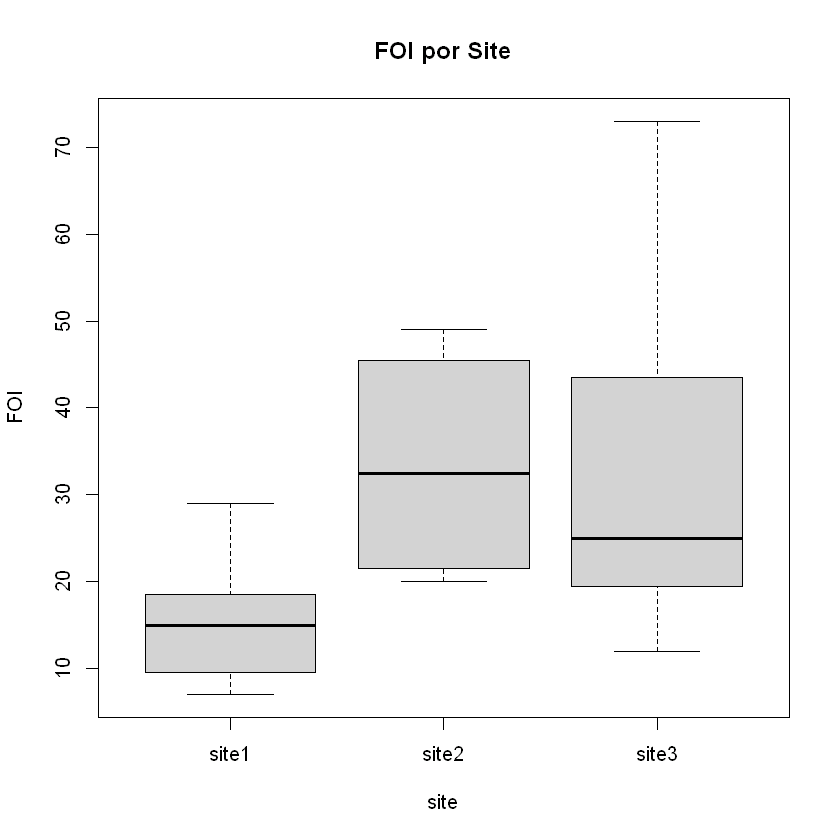

In [16]:
boxplot(YEU ~ site, data = poissons, main = "YEU por Site")
boxplot(BR ~ site, data = poissons, main = "BR por Site")
boxplot(FOI ~ site, data = poissons, main = "FOI por Site")

### 3º Passo: Teste de Diferenças entre Grupos

In [17]:
anova_results <- sapply(poissons[, -1], function(x) {
  summary(aov(x ~ poissons$site))[[1]][["Pr(>F)"]][1]
})

anova_results <- data.frame(
  Variável = names(anova_results),
  p_value = anova_results
)

print(anova_results)

     Variável      p_value
YEU       YEU 4.662628e-06
BR         BR 4.826825e-05
OP         OP 9.550610e-09
NAG       NAG 6.322385e-10
FOI       FOI 3.054544e-02
TUB       TUB 2.858285e-01
EC         EC 4.044222e-04
MUS       MUS 9.412301e-02
POI       POI 4.122394e-01
LON       LON 4.455967e-01
LART     LART 3.731434e-01
LAR       LAR 7.722709e-01
LARM     LARM 8.460384e-01
DYEU     DYEU 8.432274e-01


### 4º Passo: Verificação de Multicolinearidade

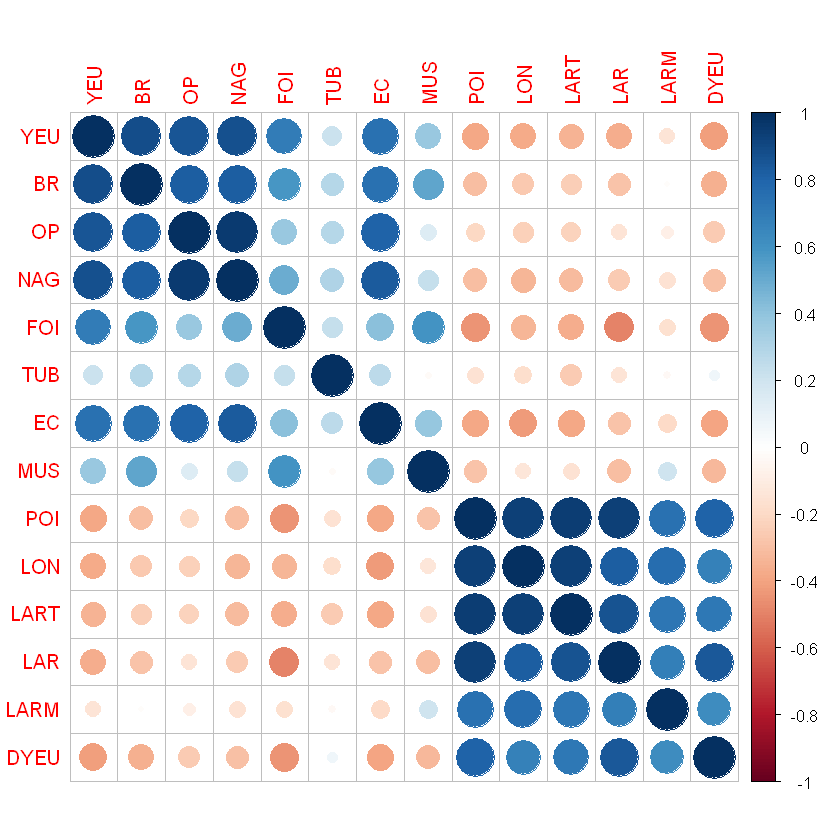

In [18]:
library(corrplot)

cor_matrix <- cor(poissons[, -1])

corrplot(cor_matrix, method = "circle")

### 5º Passo: Seleção de Variáveis

In [19]:
# Opção 1: Seleção manual
modele <- aov(NAG ~ site, data = poissons)
summary(modele)

modele_test <- lda(site ~ ., data = poissons)
modele_test

modele2 <- lda(site ~ YEU + BR, data = poissons)
modele2

prev1 <- lda(site ~ ., data = poissons, CV = TRUE)$class
table(prev1, poissons$site)

sum(prev1 != poissons$site) / nrow(poissons)

# Escolhendo o modelo 2
prev2 <- lda(site ~ YEU + BR, data = poissons, CV = TRUE)$class
table(prev2, poissons$site)
sum(prev2 != poissons$site) / nrow(poissons)

modele2_pred <- predict(modele2, newdata = poissons)$class
modele2_pred

            Df Sum Sq Mean Sq F value   Pr(>F)    
site         2 153309   76655   73.16 6.32e-10 ***
Residuals   20  20955    1048                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
lda(site ~ ., data = poissons)

Prior probabilities of groups:
    site1     site2     site3 
0.3478261 0.3478261 0.3043478 

Group means:
           YEU       BR       OP      NAG      FOI      TUB       EC      MUS
site1  8.25000  57.0000  52.3750  91.1250 15.25000 162.6250 144.0000 1.750000
site2 15.50000 108.2500  79.5000 133.1250 33.50000 341.8750 260.7500 4.625000
site3 23.57143 156.2857 207.8571 285.4286 33.71429 348.7143 515.7143 3.428571
           POI      LON     LART      LAR     LARM     DYEU
site1 92.25000 197.1250 44.75000 40.37500 13.37500 9.750000
site2 75.37500 187.5000 41.62500 38.75000 14.00000 9.875000
site3 78.14286 186.2857 41.85714 39.14286 13.28571 9.571429

Coefficients of linear discriminants:
               LD1           LD2
YEU   0.5931807506 -0.3267058452
BR    0.0152698939 -0.0210244595
OP   -0.0595033093  0.0279759774
NAG   0.0636329646  0.0270934814
FOI  -0.0888652981 -0.0026695684
TUB  -0.0008615031 -0.0008407548
EC    0.0005660807 -0.0029805814


Call:
lda(site ~ YEU + BR, data = poissons)

Prior probabilities of groups:
    site1     site2     site3 
0.3478261 0.3478261 0.3043478 

Group means:
           YEU       BR
site1  8.25000  57.0000
site2 15.50000 108.2500
site3 23.57143 156.2857

Coefficients of linear discriminants:
            LD1         LD2
YEU 0.179662906  0.25282278
BR  0.009547074 -0.03897367

Proportion of trace:
   LD1    LD2 
0.9972 0.0028 

       
prev1   site1 site2 site3
  site1     7     2     0
  site2     1     6     2
  site3     0     0     5

[1] 0.2173913

       
prev2   site1 site2 site3
  site1     8     0     1
  site2     0     6     1
  site3     0     2     5

[1] 0.173913

[1] site1 site1 site1 site1 site1 site1 site1 site1 site2 site3 site2 site2
[13] site2 site3 site2 site2 site3 site3 site3 site2 site3 site3 site2
Levels: site1 site2 site3

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

23 observations of 14 variables in 3 classes; direction: both

stop criterion: improvement less than 5%.



correctness rate: 0.91667;  in: "NAG";  variables (1): NAG 
correctness rate: 0.96667;  in: "BR";  variables (2): NAG, BR 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.6 



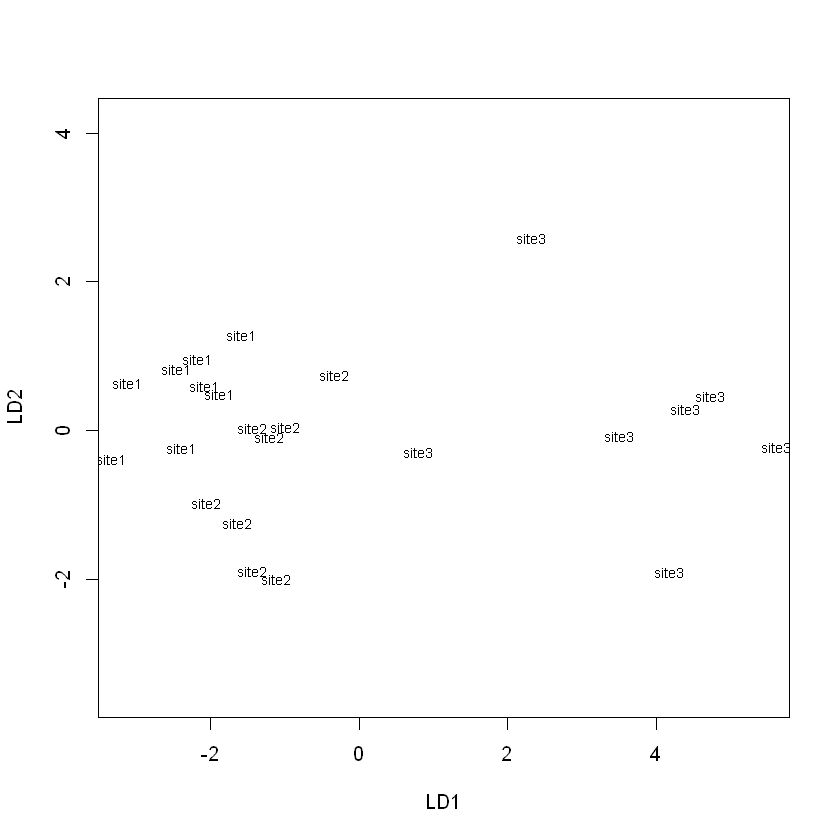

In [20]:
# Opção 2: Seleção automática com Klar
library(klaR)

preditoras <- poissons[, -1] # Todas as colunas exceto 'site'
resposta <- poissons$site

modelo_step <- stepclass(
  preditoras,
  resposta,
  method = "lda",
  direction = "both"
)

formula_lda <- modelo_step$formula
modelo_lda <- lda(formula_lda, data = poissons)
plot(modelo_lda)

### 6º Passo: Validação do Modelo

In [21]:
predicoes <- predict(modelo_lda, poissons)$class
confusao <- table(Predito = predicoes, Real = resposta)

taxa_acerto <- sum(diag(confusao)) / sum(confusao)
print(paste("Taxa de acerto:", round(taxa_acerto * 100, 2), "%"))

# Validação Cruzada
predicoes_cv <- lda(formula_lda, data = poissons, CV = TRUE)$class
confusao_cv <- table(Predito = predicoes_cv, Real = poissons$site)
taxa_acerto_cv <- sum(diag(confusao_cv)) / sum(confusao_cv)
print(paste("Taxa de acerto com validação cruzada:", round(taxa_acerto_cv * 100, 2), "%"))

[1] "Taxa de acerto: 95.65 %"
[1] "Taxa de acerto com validação cruzada: 95.65 %"


### 7º Passo: Entendimento dos Dados

In [22]:
print("Coeficientes das funções discriminantes:")
print(modelo_lda$scaling)

# Teste de Shapiro-Wilk para NAG e YEU
print("Teste de Shapiro-Wilk para NAG:")
by(poissons$NAG, poissons$site, shapiro.test)

print("Teste de Shapiro-Wilk para YEU:")
by(poissons$YEU, poissons$site, shapiro.test)

[1] "Coeficientes das funções discriminantes:"
            LD1         LD2
BR  -0.00665756 -0.03709074
NAG  0.03442129  0.01690377
[1] "Teste de Shapiro-Wilk para NAG:"


poissons$site: site1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.90214, p-value = 0.302

------------------------------------------------------------ 
poissons$site: site2

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.98898, p-value = 0.9933

------------------------------------------------------------ 
poissons$site: site3

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.9153, p-value = 0.4338


[1] "Teste de Shapiro-Wilk para YEU:"


poissons$site: site1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95901, p-value = 0.8006

------------------------------------------------------------ 
poissons$site: site2

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.74264, p-value = 0.006771

------------------------------------------------------------ 
poissons$site: site3

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.93294, p-value = 0.5762


### 8º Passo: Simulação de Novo Dado

YEU,BR,OP,NAG,FOI,TUB,EC,MUS,POI,LON,LART,LAR,LARM,DYEU
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,70,50,100,20,120,130,1,120,200,50,50,18,10


$class
[1] site1
Levels: site1 site2 site3

$posterior
      site1     site2       site3
1 0.6925111 0.3042275 0.003261414

$x
        LD1          LD2
1 -1.310992 -0.008263792

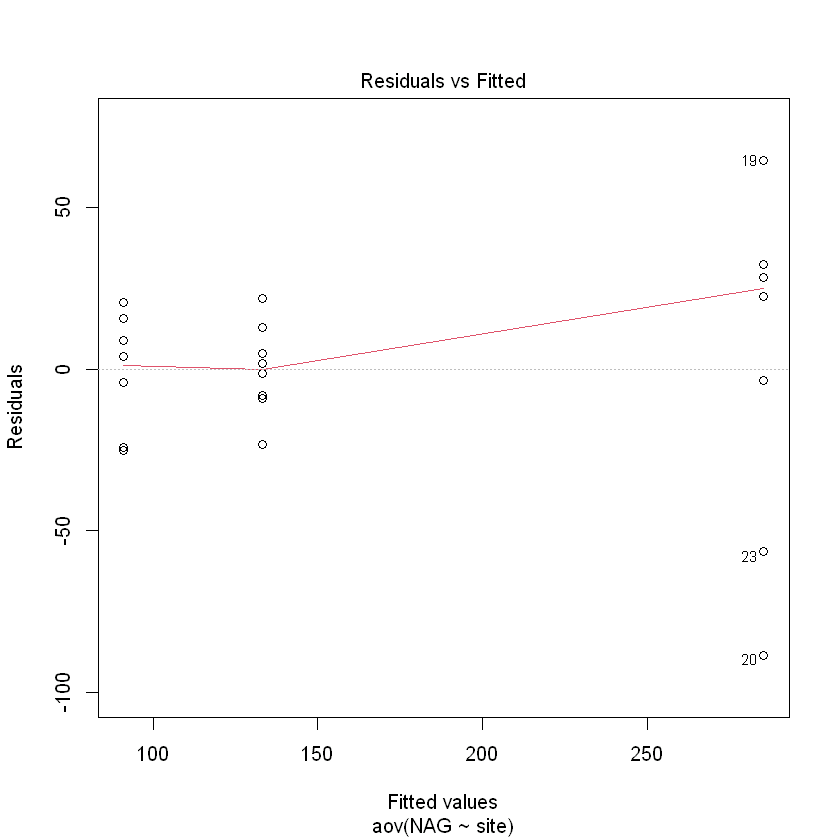

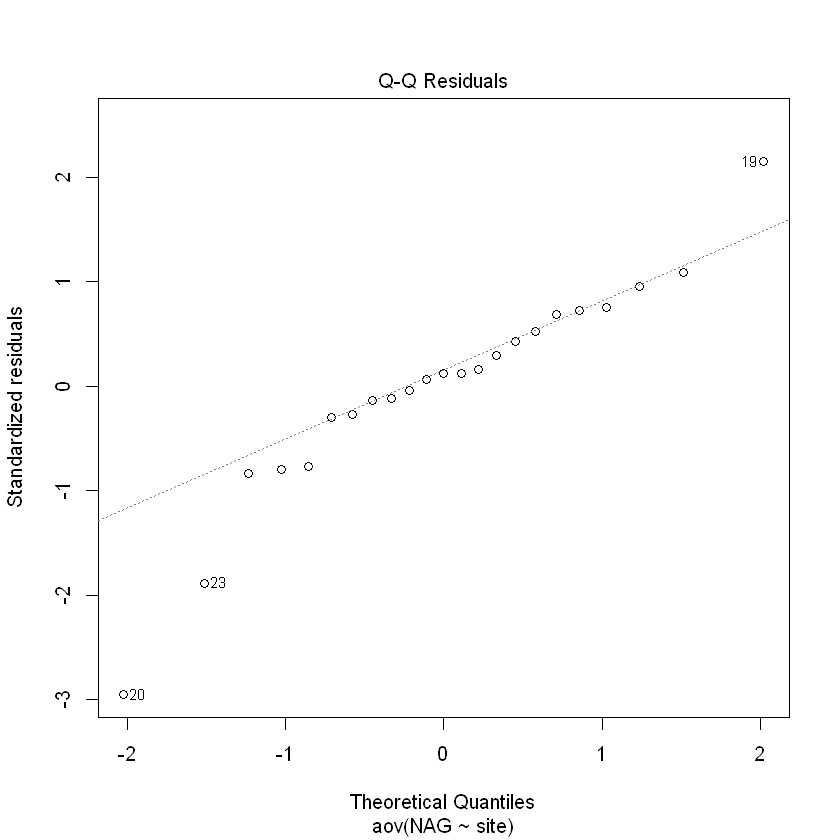

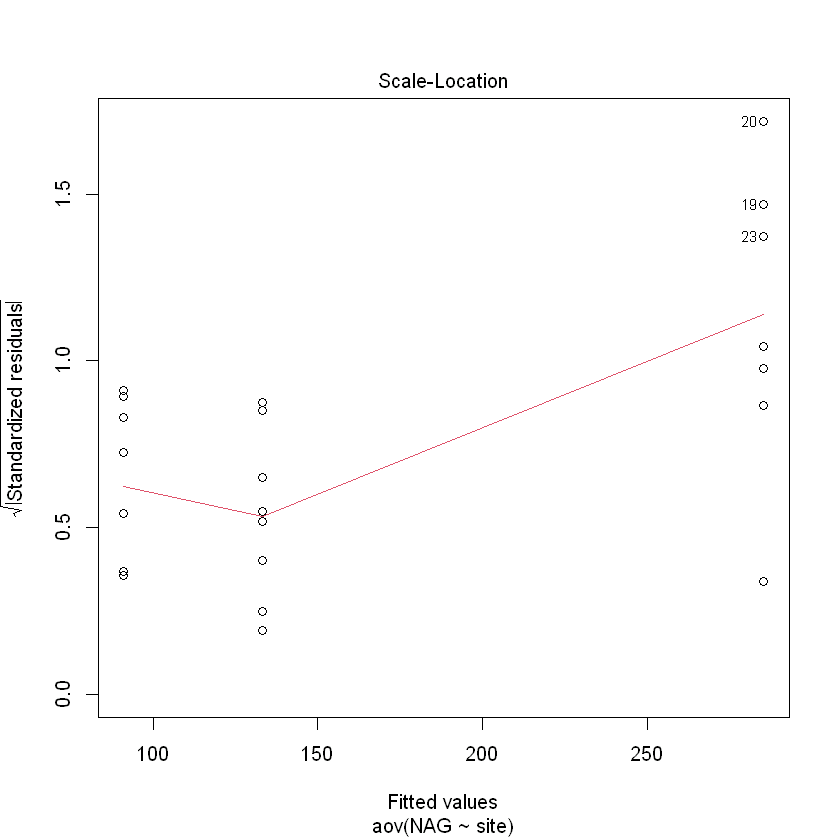

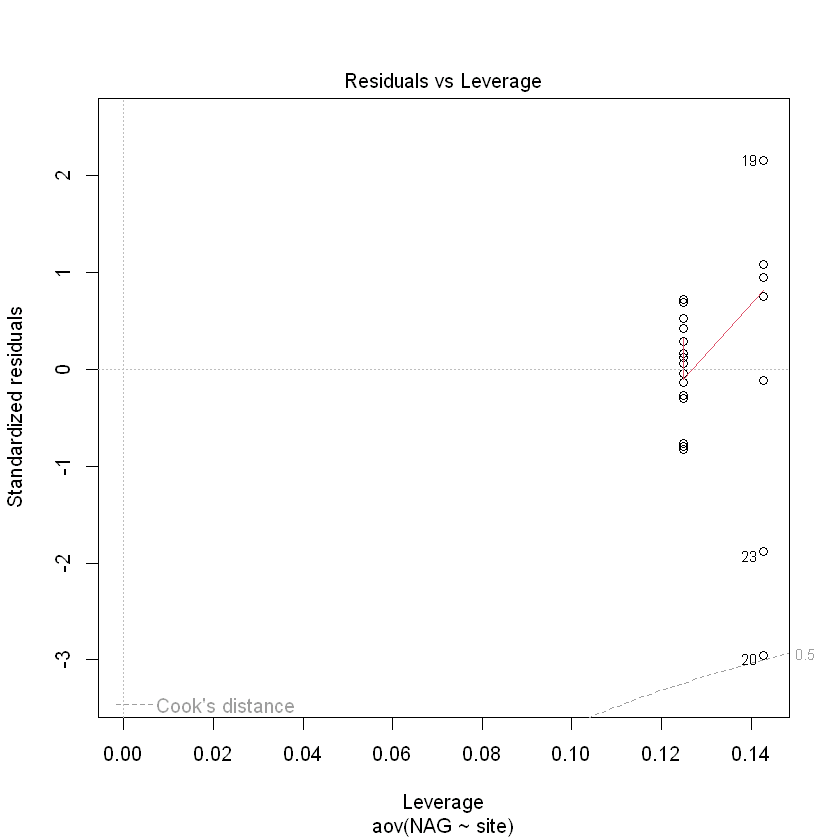

In [23]:
n_don1 <- matrix(
  c(10, 70, 50, 100, 20, 120, 130, 1, 120, 200, 50, 50, 18, 10),
  ncol = 14,
  byrow = TRUE
)
n_don1 <- data.frame(n_don1)
names(n_don1) <- names(poissons[-1])
n_don1
predict(modele2, newdata = n_don1)

plot(modele)